<a href="https://colab.research.google.com/github/FirlisaAnggraeni/Generic-Algorithm/blob/main/Tupro_AI_(Generic_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import random 
import copy
import matplotlib.pyplot as plt 


In [ ]:
#fungsi inisialisasi populasi
def in_populasi(jumlahpopulasi,panjang):
    populasi=[]
    i=0
    while i<jumlahpopulasi :
        kromosom=[random.randint(0,1) for i in range(panjang)] #untuk membuat individu
        populasi.append(kromosom)
        i+=1
    return populasi


#fungsi untuk mengubah ke bilangan real
def convert_real(rmin,rmax,bit):
    jmlbawah=sum([2**(-i)for i in range(len(bit))]) #penjumlahan dibawah per
    jmlkanan=sum([bit[i]*2**(-i)for i in range(len(bit))]) #penjumlahan sebelah kanan
    
    hasil=rmin+(((rmax-rmin)/jmlbawah)*jmlkanan)
    return hasil


#fungsi dekode
def dekode1(kromosom):
    tengah=len(kromosom)//2 #menentukan titik tengah
    
    #dekode kromosom jadi bilangan real
    x1=convert_real(-1,2, kromosom[0:tengah])
    
    return x1

def dekode2(kromosom):
    tengah=len(kromosom)//2 #menentukan titik tengah
    
    #dekode kromosom jadi bilangan real
    x2=convert_real(-1,1, kromosom[tengah:])
    
    return x2


#fungsi hitung fitness
def htg_fitness(populasi):
    fitness=[]
    x=[]
    for kromosom in populasi:
        x1 = dekode1(kromosom)
        x2 = dekode2(kromosom)
        
        #hitung hx
        hx=-(math.cos(x1) *math.sin(x2) - (x1 /(x2**2+1)))
        
        # append nilai 
        x.append([x1,x2])
        fitness.append(hx)
        
    return x,fitness


#fungsi sort populasi
def sort_populasi(x,populasi,fitness):
    fitness, populasi, x = zip(*sorted(zip(fitness, populasi, x)))
    fitness = list(fitness)
    populasi = list(populasi)
    x = list(x)

    return x, populasi,fitness

#fungsi roulette untuk menentukan orang tua
def roulette_wheel (fitness):
    _min = min(fitness)
    total = 0
    for i in fitness : 
        total = total + (i + abs(_min) + 0.02)
    r = random.uniform(0, 1)
    indv = 0
    while (r > 0 and indv < len(fitness)-1) : 
        r -= (fitness[indv] + abs(_min) + 0.02) / total
        indv += 1
    return indv

#fungsi crossover 
def crossover (ortu1, ortu2):
    _random= random.choices([0,1],[0.1,0.8])[0]
    anak1 = copy.copy(ortu1)
    anak2 = copy.copy(ortu2)
    
    
    if _random == 1 :
        titikpotong = random.randint(0, len(populasi[0]))
        anak1[0:titikpotong] = ortu1[0:titikpotong]
        anak1[titikpotong :] = ortu2[titikpotong :]
        anak2[0:titikpotong] = ortu2[0:titikpotong]
        anak2[titikpotong :] = ortu1[titikpotong :]
        
    return anak1, anak2

#fungsi mutasi
def mutasi (kromosom):
    i=0
    while i < len(kromosom):
        _random = random.choices([0,1],[0.8, 0.2])[0]
        if _random==1 :
            if kromosom[i]==1:
                kromosom[i]=0;
            else :
                kromosom[i]=1
        i+=1
    
    return kromosom
    

Generasi ke  0
Fitness :  1.1665652940307947
Individu terbaik :  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
x       :  [1.619047619047619, 0.6507936507936507]
 
Generasi ke  1
Fitness :  1.4413614155596677
Individu terbaik :  [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
x       :  [1.619047619047619, -0.33333333333333337]
 
Generasi ke  2
Fitness :  1.4413614155596677
Individu terbaik :  [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
x       :  [1.619047619047619, -0.33333333333333337]
 
Generasi ke  3
Fitness :  1.4413614155596677
Individu terbaik :  [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
x       :  [1.619047619047619, -0.33333333333333337]
 
Generasi ke  4
Fitness :  1.4413614155596677
Individu terbaik :  [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
x       :  [1.619047619047619, -0.33333333333333337]
 
Generasi ke  5
Fitness :  1.7945547869957863
Individu terbaik :  [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
x       :  [2.0, -0.23809523809523814]
 
Generasi ke  6
Fitness :  1.7945547869957863
Individu terbaik :  [1, 1, 1,

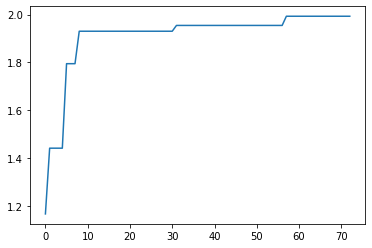

In [ ]:

jumlahpopulasi=9
panjang = 12
jumlahgenerasi= 73

#Melakukan inisialisasi populasi
populasi=in_populasi(jumlahpopulasi,panjang)
fitness_history = []
x_history = []
kromosom_history = []
i = 0
while i < jumlahgenerasi :
        
        #Hitung fitness
        x,fit=htg_fitness(populasi)
        
        #sort fitness
        x, populasi, fit= sort_populasi (x,populasi,fit)
        
        fitness_history.append(fit[-1])
        x_history.append(x[-1])
        kromosom_history.append(populasi[-1])
        
        print("Generasi ke ", i)
        print("Fitness : ", fitness_history[-1])
        print("Individu terbaik : ", kromosom_history[-1])
        print("x       : ",x_history[-1])
        print(" ")
        
        #Seleksi ortu dengan roulette wheel
        ortu1= populasi[roulette_wheel(fit)]
        ortu2= populasi[roulette_wheel(fit)]
        anak1,anak2 = crossover(ortu1,ortu2)
        
        #Crossover
        anak1,anak2= crossover(ortu1, ortu2)
        
        
        #Mutasi
        anak1 = mutasi(anak1)
        anak2 = mutasi(anak2)
        
        
        #Steady-state fitness paling buruk di replace
        populasi[0]=anak1
        populasi[1]=anak2
        
        i+=1

plt.plot(fitness_history)
     